## Part 1 

### Chapter 2: Pretrained Models

In [3]:
from torchvision import models
import torch
from torchvision import transforms
from PIL import Image
dir(models);

In [ ]:
mobilenetV2 = models.MobileNetV2()
mobilenetV2;

In [5]:
alexnet = models.AlexNet()
# we will run a forward pass through the network
resnet = models.resnet101(pretrained=True)
resnet;

we’ll see a lot of Bottleneck modules repeating one after the other (101 of them!), containing convolutions and other modules. That’s the anatomy(组成部分) of a typical deep neural network for computer vision: a more or less sequential cascade of filters and nonlinear functions, ending with a layer (fc) producing scores for each of the 1,000 output classes (out_features).

In [6]:
# picture preprocessing 
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
        )
])

img = Image.open("../data/p1ch2/bobby.jpg")

In [7]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
img_t.shape, batch_t.shape

(torch.Size([3, 224, 224]), torch.Size([1, 3, 224, 224]))

In [9]:
resnet.eval()
out = resnet(batch_t)
torch.argmax(out).item()
with open('../data/p1ch2/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 96.29336547851562)

In [10]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 96.29336547851562),
 ('Labrador retriever', 2.8081140518188477),
 ('cocker spaniel, English cocker spaniel, cocker', 0.28267380595207214),
 ('redbone', 0.20863007009029388),
 ('tennis ball', 0.11621550470590591)]

AlexNet (http://mng.bz/lo6z), ResNet (https://arxiv.org/pdf/1512.03385.pdf), and Inception v3 (https://arxiv.org/pdf/1512.00567.pdf). 

### Chapter 3 : It starts with a tensor

Deep learning really consists of building a system that can transform data from one representation to another. 

we must first have a solid understanding of how PyTorch handles and stores data—as input, as intermediate representations, and as output.

Tensor is also called multidimensional array. 

In [2]:
a = torch.ones(3)
a, a[1], float(a[1])

(tensor([1., 1., 1.]), tensor(1.), 1.0)

In [3]:
a[2] = 2.0
a

tensor([1., 1., 2.])

In [14]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points, points.shape, points[0, 1], points[0, 1].shape, points[:, 0].shape, points[0]

(tensor([[4., 1.],
         [5., 3.],
         [2., 1.]]),
 torch.Size([3, 2]),
 tensor(1.),
 torch.Size([]),
 torch.Size([3]),
 tensor([4., 1.]))

In [11]:
points = torch.zeros(3, 2)
point_column = points[:, 0]
point_column_unsqueeze = point_column.unsqueeze(0)
point_column_unsqueeze2 = point_column.unsqueeze(1)
print(point_column)
print(point_column_unsqueeze)
print(point_column_unsqueeze2)
point_column.shape, point_column_unsqueeze.shape, point_column_unsqueeze2.shape

tensor([0., 0., 0.])
tensor([[0., 0., 0.]])
tensor([[0.],
        [0.],
        [0.]])


(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [16]:
x =  torch.tensor(range(6)) # tensor([0,1,2,3,4,5])
print(x)
print(x[:]) # All elements in the list
print(x[1:4]) # From element 1 inclusive to element 4 exclusive
print(x[1:]) # From element 1 inclusive to the end of the list
print(x[:4]) # From the start of the list to element 4 exclusive
print(x[:-1]) # From the start of the list to one before the last element
print(x[1:4:2]) # From element 1 inclusive to element 4 exclusive, in stemps of 2

tensor([0, 1, 2, 3, 4, 5])
tensor([0, 1, 2, 3, 4, 5])
tensor([1, 2, 3])
tensor([1, 2, 3, 4, 5])
tensor([0, 1, 2, 3])
tensor([0, 1, 2, 3, 4])
tensor([1, 3])


In [24]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(points)
print(points[1:]) # All row after the first; implicitly all columns
print(points[1:, :]) # All rows after the first; all columns
print(points[1:, 0]) # All rows after the first; first column
print(points[None].shape) # Adds a dimension of size 1, just like unsqueeze
print(points[:,None].shape)
print(points[:,:,None].shape)
# print(points[:,:,:,None].shape) error

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
tensor([[5., 3.],
        [2., 1.]])
tensor([[5., 3.],
        [2., 1.]])
tensor([5., 2.])
torch.Size([1, 3, 2])
torch.Size([3, 1, 2])
torch.Size([3, 2, 1])


#### Named tensors

In [26]:
img_t = torch.randn(3, 5, 5)  # shape [channels, rows, columns]
weights = torch.tensor([0.2126, 0.7152, 0.0722])
batch_t = torch.randn(2, 3, 5, 5) # shape [batch, channels, rows, columns]

So sometimes the RGB channels are in dimension 0, and sometimes they are in dimen- sion 1. But we can generalize by counting from the end: they are always in [dimension –3](), the third from the end.

In [27]:
img_gray_naive = img_t.mean(-3)
batch_gray_naive = batch_t.mean(-3)
img_gray_naive.shape, batch_gray_naive.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

In [43]:
unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)
img_weights = (img_t * unsqueezed_weights)
batch_weights = (batch_t * unsqueezed_weights)
img_gray_weighted = img_weights.sum(-3)
batch_gray_weighted = batch_weights.sum(-3)
print("weights size:         ", unsqueezed_weights.shape)
print("img_weigthts size:    ", img_weights.shape)
print("batch_weights size:", batch_weights.shape)
print('img_gray_weighted size:  ', img_gray_weighted.shape)
print("batch_gray_weighted:  ", batch_gray_weighted.shape)

weights size:          torch.Size([3, 1, 1])
img_weigthts size:     torch.Size([3, 5, 5])
batch_weights size: torch.Size([2, 3, 5, 5])
img_gray_weighted size:   torch.Size([5, 5])
batch_gray_weighted:   torch.Size([2, 5, 5])


[Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)\
Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:\
Image  (3d array): 256 x 256 x 3\
Scale  (1d array):             3\
Result (3d array): 256 x 256 x 3

In [52]:
x = torch.randint(2, (3, 1, 1))
y = torch.randint(2,(2,2))
x, y, x + y

(tensor([[[0]],
 
         [[1]],
 
         [[1]]]),
 tensor([[1, 1],
         [0, 1]]),
 tensor([[[1, 1],
          [0, 1]],
 
         [[2, 2],
          [1, 2]],
 
         [[2, 2],
          [1, 2]]]))

In [53]:
img_named = img_t.refine_names(..., 'channels', 'rows', 'columns')
batch_named = batch_t.refine_names(..., 'channels', 'rows', 'columns')
print("img named:", img_named.shape, img_named.names)
print("batch named:", batch_named.shape, batch_named.names)

img named: torch.Size([3, 5, 5]) ('channels', 'rows', 'columns')
batch named: torch.Size([2, 3, 5, 5]) (None, 'channels', 'rows', 'columns')


/Users/caoyi/opt/anaconda3/envs/torchenv/lib/python3.9/site-packages/torch/_tensor.py:880: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1646756029501/work/c10/core/TensorImpl.h:1463.)
  return super(Tensor, self).refine_names(names)


In [57]:
indexes = torch.tensor(range(6), dtype=torch.short)
indexes[indexes[0]].dtype

torch.int16

In [59]:
double_points = torch.ones(10, 2, dtype=torch.double)
short_points = torch.tensor([[1, 2], [3, 4]], dtype=torch.short)
double_points = torch.zeros(10, 2).to(torch.double)
short_points = torch.ones(10, 2).to(dtype=torch.short)

double_points.dtype, short_points.dtype, double_points, short_points

(torch.float64,
 torch.int16,
 tensor([[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]], dtype=torch.float64),
 tensor([[1, 1],
         [1, 1],
         [1, 1],
         [1, 1],
         [1, 1],
         [1, 1],
         [1, 1],
         [1, 1],
         [1, 1],
         [1, 1]], dtype=torch.int16))

In [65]:
points_64 = torch.rand(5, dtype=torch.double)
points_short = points_64.to(torch.short)
points_64, points_short, points_64 * points_short  # works from PyTorch 1.3 onwards

(tensor([0.7086, 0.0760, 0.1358, 0.8451, 0.5574], dtype=torch.float64),
 tensor([0, 0, 0, 0, 0], dtype=torch.int16),
 tensor([0., 0., 0., 0., 0.], dtype=torch.float64))

#### The tensor API [torch module]

The vast majority of operations on and between tensors are available in the torch module and can also be called as methods of a tensor object.

In [68]:
a = torch.ones(3, 2)
a_t = torch.transpose(a, 0, 1)
a_t_t = a_t.transpose(0, 1)
a.shape, a_t.shape, a_t_t.shape

(torch.Size([3, 2]), torch.Size([2, 3]), torch.Size([3, 2]))

#### Tensors: Scenic views of storage

In [69]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points.storage()

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]

In [72]:
points_storage = points.storage()
points_storage[0], points_storage[1]

(4.0, 1.0)

In [73]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_storage = points.storage()
points_storage[0] = 2.0
points

tensor([[2., 1.],
        [5., 3.],
        [2., 1.]])

In [74]:
# In-place operations
a = torch.ones(3, 2)
a.zero_()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [76]:
# Tensor metadata: Size, offset, and stride
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
second_point = points[1]
second_point.storage_offset(), second_point.size(), second_point.shape

(2, torch.Size([2]), torch.Size([2]))

Accessing an element i, j in a 2D tensor results in accessing the storage_offset + stride[0] * i + stride[1] * j element in the storage. The offset will usually be zero; if this tensor is a view of a storage created to hold a larger tensor, the offset might be a positive value.

### Chapter 7 : Telling birds from airplanes : Learning from images

In [16]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())
tensor_cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
]))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [25]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in tensor_cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in tensor_cifar10_val
              if label in [0, 2]]

In [26]:
img, _ = cifar2[0]

### Chapter 8 : Using convolutions to generalize

Due to the fully connected setup needed to detect the various possible translations of the bird or airplane in the image, we have both too many parameters (making it easier for the model to memorize the training set) and no position independence (making it harder to generalize).

In [4]:
w00, w01, w02, w10, w11, w12, w20, w21, w22 = torch.zeros(9)
weight = torch.tensor([[w00, w01, w02],
                       [w10, w11, w12],
                       [w20, w21, w22]])

image = torch.tensor([[i00, i01, i02, i03, ..., i0N],
                      [i10, i11, i12, i13, ..., i1N],
                      [i20, i21, i22, i23, ..., i2N],
                      [i30, i31, i32, i33, ..., i3N],
                      ...
                      [iM0, iM1m iM2, iM3, ..., iMN]])

o11 = i11*w00 + i12*w01 + i13*w02 +
      i21*w10 + i22*w11 + i23*w12 +
      i31*w20 + i32*w21 + i33*w22

That is, we “translate” the [kernel]() on the i11 location of the input image, and we
multiply each weight by the value of the input image at the corresponding location.

For a multichannel image, like our RGB image, the weight matrix would be a [3 × 3 × 3]() matrix: one set of weights for every channel, contributing together to the output values.

Summarizing, by switching to convolutions, we get 
* Local operations on neighborhoods
* Translation invariance
* Models with a lot fewer parameters\
The key insight underlying the third point is that, with a convolution layer, the num- ber of parameters depends not on the number of pixels in the image, as was the case in our fully connected model, but rather on the size of the convolution kernel (3 × 3, 5 × 5, and so on) and on how many convolution filters (or output channels) we decide to use in our model.


In [6]:
import torch.nn as nn

In [7]:
conv = nn.Conv2d(3, 16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

For a single output pixel value, our kernel would consider, say, in_ch = 3 input channels, so the weight component for a single output pixel value (and by translation the invariance for the entire output channel) is of shape in_ch × 3 × 3.

so the complete weight tensor is out_ch × in_ch × 3 × 3, in our case 16 × 3 × 3 × 3. The bias will have size 16 

In [8]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

As usual, we need to add the zeroth batch dimension with unsqueeze if we want to call the conv module with one input image, since nn.Conv2d expects a B × C × H × W shaped tensor as input:

In [30]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

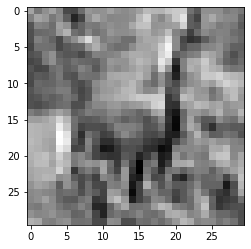

In [33]:
import matplotlib.pyplot as plt

plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()